# Assignment 5 | COMPSCI 369

- Sabaoon Raza Khan
- 983957824
- skha787

<br><br>
### Importing Packages:

In [1]:
import random
import numpy
import pandas
import math
from matplotlib import pyplot as plt
%matplotlib inline
from tree import plot_tree
from tree import compute_upgma_tree
from tree import Tree
from tree import Node
numpy.set_printoptions(precision=3)

<br><br>
## Problem 1:

Simple HMM to model secondary structure in proteins with *states* **H, S, T** and *symbols* **B, I, N**.

<hr>
**Part (a)** <br>
- Simulating a state and symbol sequence pair (π, x) of length 100. <br>
- Outputs: π and x 

In [2]:
# Simulates an HMM

# Transition matrix a, emission matrix e, number of simulations n, starting state s
def simulate_HMM(a, e, n, s):
    
    symbols = []
    states = []
    
    for i in range(n):
        
        states.append(s)
        symbolEmitted = numpy.random.choice(list(e.T.index), 1, p = list(e.T[s]))[0]
        symbols.append(symbolEmitted)
        s = numpy.random.choice(list(a.T.columns), 1, p = list(a.T[s]))[0]
        
    return "".join(states), "".join(symbols)

    
stateNames = ["H", "S", "T"]
symbolNames = ["B", "I", "N"]

# Will transpose the matrices for easier access to rows (which are now columns)
transitionMatrix = pandas.DataFrame(numpy.matrix('0.95 0.01 0.04;0.0333 0.9167 0.05;0.05 0.05 0.9'), index=stateNames, columns=stateNames)
emissionMatrix = pandas.DataFrame(numpy.matrix('0.35 0.55 0.10; 0.55 0.15 0.30; 0.10 0.10 0.80'), index=stateNames, columns=symbolNames)


print("-" * 100)
print("\nTransition Probabilities:\n\n", transitionMatrix, sep="")
print()
print("\nEmission Probabilities:\n\n", emissionMatrix, sep="")
print()
print("-" * 100)

stateSeq, symbolSeq = simulate_HMM(transitionMatrix, emissionMatrix, 100, "H")

print("\nπ | State Sequence:\n", stateSeq, sep="")
print("\nx | Symbol Sequence:\n", symbolSeq, sep="")
print()
print("-" * 100)

----------------------------------------------------------------------------------------------------

Transition Probabilities:

        H       S     T
H  0.9500  0.0100  0.04
S  0.0333  0.9167  0.05
T  0.0500  0.0500  0.90


Emission Probabilities:

      B     I    N
H  0.35  0.55  0.1
S  0.55  0.15  0.3
T  0.10  0.10  0.8

----------------------------------------------------------------------------------------------------

π | State Sequence:
HHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHSSSSTTTTSSSSSSSSSS

x | Symbol Sequence:
IBIIIIIBIIIIBNBINIIBBBBNNININIIBNIBNNIIIBNIBIBIIBBIINBIIIBIBBBIBIIBIIIIIBIIBBIIIIIBBNNNNBNNNNBNBNBBB

----------------------------------------------------------------------------------------------------


<br><br><hr>
**Part (b)** <br>
- Modifying the supplied forward and backward algorithm functions to return matrices.
- Calculating the matrix P where the (k, i)th entry of P is $P(k, i) = Pr(πi = k|x)$, the posterior probability of being in state k at step i.
- Notice that P(k, i) is not a log probability. 
- Show that your method is correct by checking the column sums of P are all 1.

<br><br>
**Forward Algorithm:**

In [3]:
# Finds log probability of observing sequence x
def forward(a, e, x, startingProbs = []):
    
    # Create the forward table with 1 row and for each state and x.length columns 
    F = numpy.zeros([a.shape[0], len(x)])
    
    
    # If starting probs unspecified, assume uniformity
    if not len(startingProbs):
        startingProbs = [numpy.log(1/a.shape[0]) for x in range(a.shape[0])]
    
    # Convert to log probs
    else:
        startingProbs = [numpy.log(x) for x in startingProbs]
        
        
    # Convert A and E to log space (and transpose to get easier access to their rows)
    logA = pandas.DataFrame(numpy.log(a.as_matrix().T), index=a.columns, columns=a.index)
    logE = pandas.DataFrame(numpy.log(e.as_matrix().T), index=e.columns, columns=e.index)
    stateNames = list(logA.columns)
    
    
    # Initialise first column
    for row in range(a.shape[0]):
        F[row,0] = startingProbs[row] + logE[stateNames[row]][x[0]]
        
        
    # Iterate through remaining columns
    for col in range(1,len(x)):
        for row in range(a.shape[0]):
            F[row,col] = logE[stateNames[row]][x[col]]
            
            logSumPrevCol = 0
            for prevRow in range(a.shape[0]):
                logSumPrevCol = logSumPrevCol + math.exp(F[prevRow,col-1] + logA[stateNames[prevRow]][stateNames[row]]) 
                
            F[row,col] = F[row,col] + math.log(logSumPrevCol)
        
        
    # Terminate by returning p(x) in log space
    pX = numpy.log(numpy.sum(numpy.exp(F[:,len(x)-1])))     
        
        
    # Forward Matrix & log probability
    return F, pX
    

F, pX = forward(transitionMatrix, emissionMatrix, symbolSeq)
print("\nLog Probability: ", pX, "\n\nForward Matrix:\n", F, sep="")


Log Probability: -99.9040765737

Forward Matrix:
[[  -1.696   -2.779   -3.409   -4.053   -4.7     -5.349   -5.997   -7.097
    -7.745   -8.393   -9.042   -9.69   -10.791  -13.143  -14.217  -14.852
   -17.202  -17.813  -18.454  -19.553  -20.652  -21.749  -22.843  -25.187
   -27.484  -27.847  -30.151  -30.519  -32.825  -33.193  -33.795  -34.886
   -37.232  -37.827  -38.916  -41.26   -43.549  -43.862  -44.455  -45.093
   -46.191  -48.541  -49.154  -50.247  -50.89   -51.989  -52.634  -53.282
   -54.382  -55.482  -56.128  -56.775  -59.128  -60.206  -60.844  -61.49
   -62.138  -63.239  -63.886  -64.986  -66.085  -67.183  -67.827  -68.927
   -69.572  -70.22   -71.321  -71.968  -72.616  -73.264  -73.913  -74.561
   -75.662  -76.309  -76.958  -78.058  -79.158  -79.804  -80.452  -81.1
   -81.749  -82.397  -83.498  -84.597  -86.948  -89.271  -91.418  -92.907
   -92.334  -94.427  -95.862  -96.551  -96.959  -96.052  -98.134  -98.289
  -100.383 -100.656 -101.443 -102.272]
 [  -2.996   -3.607   -5.5

<br>
**Backward Algorithm:**

In [4]:
# Finds log probability of observing sequence x
def backward(a, e, x, startingProbs = []):
    
    # Create the forward table with 1 row and for each state and x.length columns 
    B = numpy.zeros([a.shape[0], len(x)])
    
    
    # If starting probs unspecified, assume uniformity
    if not len(startingProbs):
        startingProbs = [numpy.log(1/a.shape[0]) for x in range(a.shape[0])]
    
    # Convert to log probs
    else:
        startingProbs = [numpy.log(x) for x in startingProbs]
        
        
    # Convert A and E to log space
    logA = pandas.DataFrame(numpy.log(a.as_matrix().T), index=a.columns, columns=a.index)
    logE = pandas.DataFrame(numpy.log(e.as_matrix().T), index=e.columns, columns=e.index)
    stateNames = list(logA.columns)
    
    
    # Last column set to zero (ending states not modelled)
     
    
    # Iterate through remaining columns
    for col in range(len(x)-2,-1,-1):
        for row in range(a.shape[0]):
            
            for prevRow in range(a.shape[0]):
                B[row,col] = B[row,col] + math.exp(logE[stateNames[prevRow]][x[col+1]] + B[prevRow,col+1] + logA[stateNames[row]][stateNames[prevRow]]) 
                
            B[row,col] = numpy.log(B[row,col])
     
    
    # Terminate by returning p(x) in log space
    PX = 0
    for row in range(a.shape[0]):
        PX = PX + math.exp(logE[stateNames[row]][x[0]] + B[row,0] + startingProbs[row]) 
    PX = numpy.log(PX)
        
    
    # Backward Matrix & log probability
    return B, PX

  
B, PX = backward(transitionMatrix, emissionMatrix, symbolSeq)
print("\nLog Probability: ", PX, "\n\nBackward Matrix:\n", B, sep="")  


Log Probability: -99.9040765737

Backward Matrix:
[[ -98.25   -97.15   -96.502  -95.853  -95.205  -94.557  -93.908  -92.809
   -92.161  -91.513  -90.868  -90.23   -89.175  -86.891  -85.799  -85.162
   -82.863  -82.22   -81.595  -80.577  -79.54   -78.504  -77.533  -75.726
   -73.473  -72.836  -70.548  -69.905  -67.586  -66.94   -66.3    -65.237
   -62.971  -62.333  -61.286  -59.108  -56.777  -56.129  -55.481  -54.835
   -53.745  -51.416  -50.768  -49.669  -49.021  -47.921  -47.273  -46.625
   -45.528  -44.429  -43.781  -43.138  -40.812  -39.713  -39.064  -38.416
   -37.768  -36.67   -36.023  -34.927  -33.829  -32.73   -32.082  -30.982
   -30.334  -29.686  -28.586  -27.937  -27.289  -26.64   -25.992  -25.344
   -24.245  -23.596  -22.948  -21.85   -20.751  -20.102  -19.454  -18.807
   -18.163  -17.536  -16.529  -15.665  -15.325  -14.934  -14.284  -12.882
   -12.04   -11.662  -11.18   -10.371   -8.904   -8.121   -6.319   -5.37
    -3.205   -2.145   -1.073    0.   ]
 [-100.463 -100.177  -9

<br>
**Matrix P** where the (k, i)th entry of P is **P(k, i) = Pr(πi = k|x)**, the **posterior probability** of being in state k at step i.

In [5]:
def posterior(FMat, BMat, a, x, PX):
    P = numpy.zeros([a.shape[0], len(x)])
    rows, cols = P.shape
    
    for r in range(rows):
        for c in range(cols):
            P[r][c] = (math.exp(FMat[r][c]) * math.exp(BMat[r][c])) / math.exp(PX)
            
            
    # Column sums of P should all be 1.  
    colSum = P.sum(axis=0)
    
    return colSum, numpy.asarray(P)
    
    
colSum, P = posterior(F, B, transitionMatrix, symbolSeq, PX)

print("\nShowing method is correct by checking if column sums of P all add up to 1:\n\n", colSum, sep="") 
print("\n\nP | Posterior Probability Matrix:\n\n", P, sep="")


Showing method is correct by checking if column sums of P all add up to 1:

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


P | Posterior Probability Matrix:

[[  9.585e-01   9.753e-01   9.929e-01   9.975e-01   9.987e-01   9.989e-01
    9.987e-01   9.975e-01   9.983e-01   9.978e-01   9.949e-01   9.836e-01
    9.406e-01   8.786e-01   8.940e-01   8.961e-01   8.518e-01   8.787e-01
    8.651e-01   7.977e-01   7.503e-01   7.060e-01   6.239e-01   3.645e-01
    3.487e-01   4.589e-01   4.520e-01   5.944e-01   6.022e-01   7.961e-01
    8.266e-01   8.035e-01   7.410e-01   7.742e-01   7.422e-01   6.293e-01
    6.552e-01   9.170e-01   9.683e-

<br><br><hr>

**Part (c)** <br>
- Plot of Pr(πi = H|x) against the index i. 
- Plot i on the horizontal axis (x-axis) 
- Pr(πi = H|x) on the vertical axis (y-axis) 
- To embed the plot, include the command **%matplotlib inline** in the first cell of the notebook.

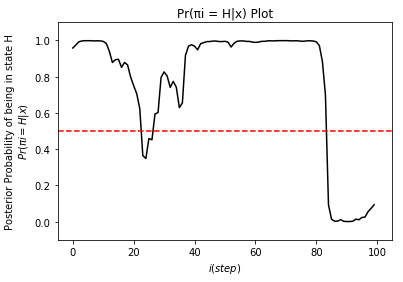


π | True State Sequence: HHHHHHHHHHHHHHHHHHHHHHHTTTHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHSSSSTTTTSSSSSSSSSS


In [6]:
print()
plt.title('Pr(πi = H|x) Plot')
plt.xlabel("$i (step)$")
plt.ylabel("Posterior Probability of being in state H\n$Pr(πi = H|x)$")
plt.plot([i for i in range(100)], P[0][[i for i in range(100)]], 'k-')    # x-axis (Column 1) & y-axis (Column 2)
plt.axis([-5, 105, -0.1, 1.1])                                            # Setting the range for the x and y axes
plt.axhline(y = 0.5, color = 'r', linestyle = '--')
plt.show()

print("\nπ | True State Sequence:", stateSeq)

<br><br><hr>

**Part (d)** <br>
By comparing the plot to the true state sequence π, discuss whether or not
you think you could accurately find the α-helices in a given protein sequence
using this model.

**Answer:**<br>
By comparing the plot to the true state sequence π, we could fairly accurately find the α-helices in a given protein sequence, since all the peaks, particularly above the red line in the model indicate where the α-helices lie.

<hr><br><br><br>
## Problem 2:

- Method that simulates random trees.
- Extending the sequence simulator written in Assignment 3 to work with these trees.
- Calculating a distance matrix from the simulated sequences and then reconstructing the tree from this distance matrix.

<hr>
**Part (a)** <br>
Method that simulates trees according to the Yule model. 
- **Input:** Number of leaves (**n**) and the branching parameter (**λ**).

In [7]:
def yule_tree(λ, n):
    
    nodes = []
    for i in range(1, n+1):    
        nd = Node(str(i))
        nd.set_height(0)
        nodes.append(nd) 
        
    times = []
    k = n
    t = 0.0
    while k > 1:
        t += numpy.random.exponential(1/(k*λ))
        times.append(t)
        k -= 1
    times.sort() # ascending order
    
    for t in times:
        m = Node()
        i, j = numpy.random.choice(nodes, 2, replace=False)
        m.set_height(t)
        m.add_child(i)
        m.add_child(j)
        nodes.append(m)
        nodes.remove(i)
        nodes.remove(j)
        
    return Tree(nodes[0])

<br>
- To check the correctness of the implementation, we **simulate 1000 trees** with
**λ = 0.5** and **n = 10** and check that the mean height of the trees (that is, the
time of the root node) agrees with the **theoretical mean of 3.86**. <br>
Using the provided plot_tree method to include a picture of a simulated tree
with 10 leaves and λ = 0.5 in the report.


Mean height of the trees: 3.86064216362
(Agrees with the theoretical mean of 3.86)



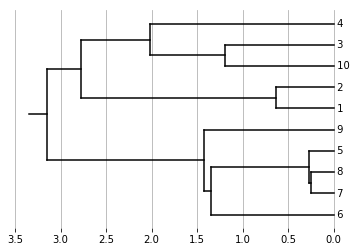

In [8]:
λ = 0.5           # Branching parameter
n = 10            # Number of leaves
numTrees = 1000

print("\nMean height of the trees:", numpy.mean([yule_tree(λ, n).get_root().get_height() for num in range(numTrees)]))
print("(Agrees with the theoretical mean of 3.86)\n")

# Plotting the simulated tree:
tree = yule_tree(λ, n)
plot_tree(tree)

<br><br><hr>
**Part (b)** <br>
Method to simulate sequences down a simulated tree according to the Jukes-Cantor model. <br>

- Input: Tree with **n leaves**, **sequence length L**, and a **mutation rate µ**. 
- Output: **Matrix of sequences** corresponding to nodes in the tree or the **tree with sequences stored at the nodes**.

Your method should generate a uniform random sequence of length L at the root node and recursively mutate it down the branches of the tree, using the node heights to calculate branch length.<br><br><br> 

**Pseudocode methods** for *random sequence generation* and *mutation* down a lineage are provided below:

In [9]:
# Pseudocode methods

# ---------------------------------------------------------------------------------------------------------------
# The method randseq simulates a uniform random sequence.

# randseq(L)
    # for (i in 1 to L)
        # seq[i] = choice([’A’,’C’,’G’,’T’], [0.25,0.25,0.25,0.25])
    # return seq
# ---------------------------------------------------------------------------------------------------------------


# ---------------------------------------------------------------------------------------------------------------
# The method mutate mutates a given sequence according to the Jukes-Cantor model of mutation over a given length.
# The mutate method below allows “mutations” from a base to itself. 
# The uncorrected mutation rate (µ rather than (3/4)µ) can therefore be used.

# mutate(X, t, mu)
    # L = X.length()
    # \\ the number of mutations is Poisson with total rate L*mu*t
    # numMutation = randpoiss(L*mu*t)
    # \\ for each mutation, choose a site to mutate and mutate it
    # for (i in 1 to numMutation)
        # \\ choose a site
        # site = ceiling(random()*L)
        # \\ mutate that site
        # X[site] = choice([’A’,’C’,’G’,’T’], [0.25,0.25,0.25,0.25])
    # return X
# ---------------------------------------------------------------------------------------------------------------

<br><br>
**The method randseq simulates a uniform random sequence of given length L.**

In [10]:
def randseq(L):
    seq = []
    for i in range(L):
        seq.append(str(numpy.random.choice(['A','C','G','T'])))
    return ''.join(seq)

<br>
**The method mutate mutates a given sequence according to the Jukes-Cantor model of mutation over a given length.**

In [11]:
def mutate(X, t, mu):
    L = len(X)
    X_array = list(X)
    numMutation = numpy.random.poisson(L*mu*t)                     # the number of mutations is Poisson with total rate L*mu*t
    for i in range(numMutation):                                   # for each mutation, choose a site to mutate and mutate it
        site = math.ceil(random.random() * L)                      # choose a site
        X_array[site-1] = numpy.random.choice(['A','C','G','T'])   # mutate that site
    return ''.join(X_array)

<br>
**Method to simulate sequences down a simulated tree according to the Jukes-Cantor model.** 

In [12]:
# Takes a tree (node) with n leaves, sequence length L, and a mutation rate µ (mu)

def simulateSeq(node, mu, L = None):
    if L:
        node = node.get_root()
        node.set_sequence(randseq(L))
    if not node.is_root():
        parent = node.get_parent()
        t = parent.get_height() - node.get_height()
        S = mutate(parent.get_sequence(), t, mu)
        node.set_sequence(S)
    if not node.is_leaf():
        for child in node.get_children():
            simulateSeq(child, mu)

<br><br><hr>
**Part (c)** <br>
Write a method to calculate the **Jukes-Cantor distance matrix *d***, from a set
of sequences, where **dij** is the *distance between the ith and the jth sequences*.

In [13]:
# Using the formulas given in the assignment:

def D(x, y):
    return (sum(1 for a, b in zip(x, y) if a != b))

def f(x, y):
    L = len(x)
    return (min(D(x,y) / L, 3/4 - 1/L))

def d(x, y):
    return (- 3/4 * numpy.log(1 - (4/3 * f(x, y))))

def distMat(seqs): # Distance matrix
    seqs = list(map(Node.get_sequence, seqs))          # Node.get_sequence (Function), seqs (Iterable)
    return [[d(x, y) for y in seqs] for x in seqs]

<br>
Include a ***simulated set of sequences*** of length **L = 20** from the tree leaves and
corresponding ***distance matrix*** in your report for a tree with **n = 10**, **λ = 0.5**
and mutation parameter **µ = 0.1**.

In [14]:
L = 20
µ = 0.1

# Using the previously simulated yule tree with n = 10, λ = 0.5.
simulateSeq(tree, µ, L)

#--------------------------------------------------------------------------------------------------------
# Getting simulated tree sequences
def getSequences(tree):
    return sorted(tree.get_leaves(), key=lambda l: int(l.get_label()))

sequences = getSequences(tree)
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------
# Printing set of sequences
print("\nSimulated set of sequences:\n")
for seq in sequences:
    print('{:2} => {}'.format(seq.get_label(), seq.get_sequence())) #{:2} = Assigning 2 spaces before =>
#--------------------------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------------------------
# Printing distance matrix for all sequences 
def printMat(matrix):
    for row in matrix:
        print(' '.join(map('{:.3f}'.format, [x+0 for x in row])))  #Formatting to 3 significant figures

print("\n\nCorresponding distance matrix:\n")
printMat(distMat(sequences))
#--------------------------------------------------------------------------------------------------------


Simulated set of sequences:

1  => CGTGCGTGTTCCTGTTGATA
2  => GGTGCGTGTTCCTGTTGATA
3  => GGCGCATGTTTGTCTAGGTA
4  => GGTGCTTGTTACTGTAAATA
5  => GGTGCGTGTTCCTGTAGATT
6  => GGTGCGTGTTCTTGTAGTTT
7  => GGTGCGTGTTCCTGTAGATT
8  => GGTGCGTGTTCCTGTAGATT
9  => GATGCGTGTTCCTGTAGATC
10 => GGCGCATTTTTCTGTAGCTA


Corresponding distance matrix:

0.000 0.052 0.572 0.304 0.167 0.304 0.167 0.167 0.233 0.471
0.052 0.000 0.471 0.233 0.107 0.233 0.107 0.107 0.167 0.383
0.572 0.471 0.000 0.471 0.471 0.471 0.471 0.471 0.572 0.233
0.304 0.233 0.471 0.000 0.233 0.383 0.233 0.233 0.304 0.383
0.167 0.107 0.471 0.233 0.000 0.107 0.000 0.000 0.107 0.383
0.304 0.233 0.471 0.383 0.107 0.000 0.107 0.107 0.233 0.471
0.167 0.107 0.471 0.233 0.000 0.107 0.000 0.000 0.107 0.383
0.167 0.107 0.471 0.233 0.000 0.107 0.000 0.000 0.107 0.383
0.233 0.167 0.572 0.304 0.107 0.233 0.107 0.107 0.000 0.471
0.471 0.383 0.233 0.383 0.383 0.471 0.383 0.383 0.471 0.000


<br><br><hr>
**Part (d)**

In [15]:
def simulateByLength(tree, L):
    simulateSeq(tree, 0.1, L) # Fixed µ = 0.1
    D = distMat(getSequences(tree))
    return D, plot_tree(compute_upgma_tree(D))

<br>
**Plot of the original tree:**

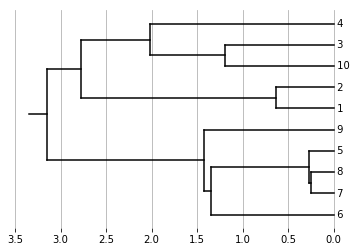

In [16]:
plot_tree(tree)

<br><br>
- **Simulating three sets of sequences** with lengths **L = 20**, **L = 50** and **L = 200**, respectively, with fixed **µ = 0.1**. 
- Calculating & **printing distance matrix for each**.
- **Plotting the reconstructed trees**.

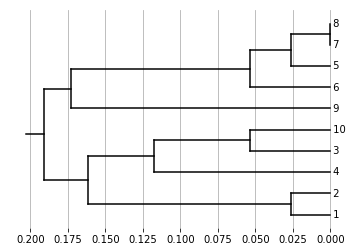



Distance Matrix | Length = 20:

0.000 0.052 0.233 0.471 0.471 0.383 0.471 0.471 0.572 0.383
0.052 0.000 0.167 0.383 0.471 0.304 0.471 0.471 0.471 0.304
0.233 0.167 0.000 0.167 0.233 0.107 0.233 0.233 0.233 0.107
0.471 0.383 0.167 0.000 0.471 0.304 0.471 0.471 0.471 0.304
0.471 0.471 0.233 0.471 0.000 0.107 0.052 0.052 0.383 0.383
0.383 0.304 0.107 0.304 0.107 0.000 0.107 0.107 0.233 0.233
0.471 0.471 0.233 0.471 0.052 0.107 0.000 0.000 0.383 0.383
0.471 0.471 0.233 0.471 0.052 0.107 0.000 0.000 0.383 0.383
0.572 0.471 0.233 0.471 0.383 0.233 0.383 0.383 0.000 0.383
0.383 0.304 0.107 0.304 0.383 0.233 0.383 0.383 0.383 0.000



In [17]:
matrix_20, reconstructedTree = simulateByLength(tree, 20)

print("\n\nDistance Matrix | Length = 20:\n")
printMat(matrix_20)
print()

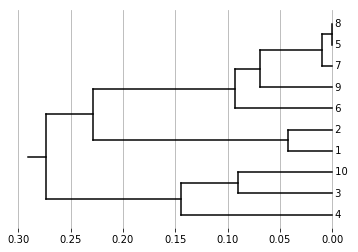



Distance Matrix | Length = 50:

0.000 0.085 0.453 0.663 0.453 0.490 0.417 0.453 0.490 0.453
0.085 0.000 0.530 0.663 0.417 0.530 0.453 0.417 0.453 0.453
0.453 0.530 0.000 0.260 0.490 0.572 0.490 0.490 0.490 0.180
0.663 0.663 0.260 0.000 0.572 0.713 0.572 0.572 0.663 0.319
0.453 0.417 0.490 0.572 0.000 0.180 0.020 0.000 0.131 0.490
0.490 0.530 0.572 0.713 0.180 0.000 0.206 0.180 0.180 0.663
0.417 0.453 0.490 0.572 0.020 0.206 0.000 0.020 0.155 0.490
0.453 0.417 0.490 0.572 0.000 0.180 0.020 0.000 0.131 0.490
0.490 0.453 0.490 0.663 0.131 0.180 0.155 0.131 0.000 0.530
0.453 0.453 0.180 0.319 0.490 0.663 0.490 0.490 0.530 0.000



In [18]:
matrix_50, reconstructedTree = simulateByLength(tree, 50)

print("\n\nDistance Matrix | Length = 50:\n")
printMat(matrix_50)
print()

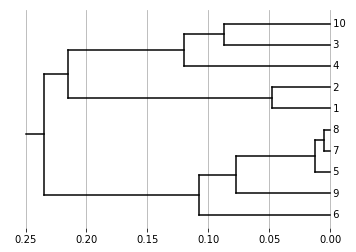



Distance Matrix | Length = 200:

0.000 0.096 0.409 0.462 0.409 0.540 0.417 0.409 0.481 0.409
0.096 0.000 0.400 0.481 0.409 0.550 0.417 0.409 0.510 0.417
0.409 0.400 0.000 0.239 0.417 0.593 0.417 0.417 0.471 0.174
0.462 0.481 0.239 0.000 0.471 0.627 0.471 0.471 0.540 0.239
0.409 0.409 0.417 0.471 0.000 0.219 0.031 0.020 0.167 0.435
0.540 0.550 0.593 0.627 0.219 0.000 0.206 0.193 0.246 0.561
0.417 0.417 0.417 0.471 0.031 0.206 0.000 0.010 0.155 0.426
0.409 0.409 0.417 0.471 0.020 0.193 0.010 0.000 0.143 0.426
0.481 0.510 0.471 0.540 0.167 0.246 0.155 0.143 0.000 0.453
0.409 0.417 0.174 0.239 0.435 0.561 0.426 0.426 0.453 0.000



In [19]:
matrix_200, reconstructedTree = simulateByLength(tree, 200)

print("\n\nDistance Matrix | Length = 200:\n")
printMat(matrix_200)
print()

<br>
**Comment on the quality of the reconstructions and the effect that increasing
the sequence length has on the accuracy of the reconstruction.**<br>
Generally, increasing the sequence length tends to increase the accuracy of the tree reconstructions. Even so, with more sequence data the accuracy of the node heights improve substantially.